# Examen parcial 2 (Interpolación y cálculo numérico)
* Cree un cuaderno jupyter y separe claramente cada ejercicio
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10 am del 17.09.2021 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

## Ejercicio 1

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas y hacer un gráfico de P vs T (usar el gráfico de dispersión con puntos negros)
* b) interpolar los puntos (100 puntos) para hacer P vs T ¡MÁS SUAVE!
* c) grafique los puntos interpolados de P vs T en el mismo gráfico que el original (use el gráfico de dispersión y los puntos rojos)
* d) utilizando la derivada numérica, encuentre la capacidad calorífica. Si el scipy.misc.derivative no sirve, use numpy.gradient.
* e) compare $ C_v $ con los datos originales y $ C_V $ de los datos interpolados (grábelos en el mismo gráfico.
* f) ¿cuál es la diferencia entre scipy.misc.derivative y numpy.gradient?

*Básicamente, este ejercicio pide dos gráficos con dos curvas en cada gráfico. Los gráficos deben tener etiquetas para el eje x y el eje y y una leyenda para cada curva.

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

## Solution Ejercicio 1

In [1]:
import pandas as pd

df=pd.read_csv('data_pressure_vs_temparature.csv')
df.head()

Pressure=df['Pressure']
Temperature=df['Temperature']

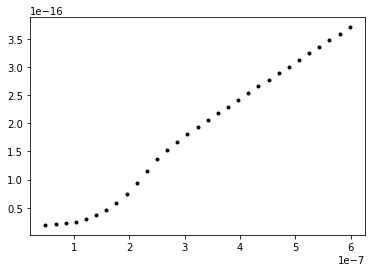

In [2]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1,1)
ax.plot(Temperature,Pressure,'.k')

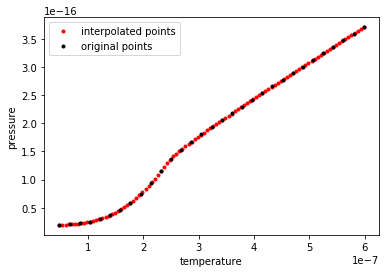

In [9]:
from scipy import interpolate
from scipy.interpolate import CubicSpline
import numpy as np

f_interpolation = interpolate.interp1d(Temperature,Pressure,kind='cubic')  #Using cubic splines.
## or 
f_interpolation = CubicSpline(Temperature, Pressure)


Temp_interp=np.linspace(Temperature.iloc[0],Temperature.iloc[-1],100)
# or convertir Temperature y Pression a numpy arrays
Temp_interp=np.linspace(np.array(Temperature)[0],np.array(Temperature)[-1],100)


Pressure_interp=f_interpolation(Temp_interp)
fig, ax=plt.subplots(1,1)
ax.plot(Temp_interp,Pressure_interp,'.r',label='interpolated points')
ax.plot(Temperature,Pressure,'.k',label='original points')
ax.set_xlabel('temperature')
ax.set_ylabel('pressure')
ax.legend()
#plt.show()

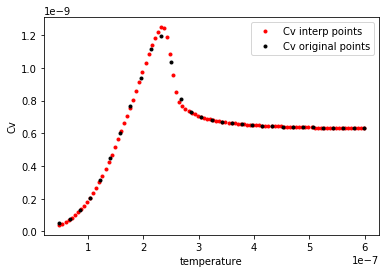

In [4]:
fig, ax = plt.subplots(1,1)

Cv_interp=np.gradient(Pressure_interp,Temp_interp)
ax.plot(Temp_interp, Cv_interp, '.r',label='Cv interp points')

Cv=np.gradient(Pressure,Temperature)
ax.plot(Temperature, Cv, '.k',label='Cv original points')

ax.set_xlabel('temperature')
ax.set_ylabel('Cv')
ax.legend()
#plt.show()

# Importante
* scipy.misc.derivative: se usa mas cuando sabemos la funcion (como $y=sin(x)$)

* numpy.gradient: se usa mas cuando tememos puntos y no sabemos exactamente como $y$ depende de $x$

## Ejercicio  2

Grafica la función:

$$ F_{a, b} = \int_0 ^{10} (sin (ax) + cos (bx^ 2)) \ dx $$

donde $ a $ es solo un número y $ b $ es una numpy arrray, digamos:

a = 1

b = np.linspace (0,1,101)

El gráfico deben tener etiquetas para eje x y eje y. 

## Solution Ejercicio 2

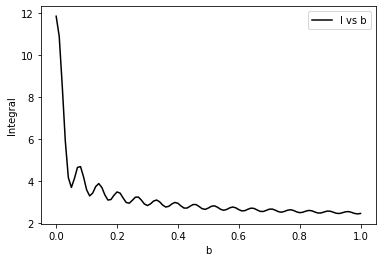

In [5]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

def integrand(x,a,b):
    return np.sin(a*x) + np.cos(b*x**2)

Is=[]
t=10
a=1
b=np.linspace(0,1,101)
fig, ax = plt.subplots(1,1)
for i in b:
    I,error = integrate.quad(integrand, 0, t,args=(a,i))
    Is.append(I)
ax.plot(b,Is,'-k',label='I vs b')
ax.set_xlabel('b')
ax.set_ylabel('Integral')
ax.legend()

Text(0, 0.5, 'Integral')

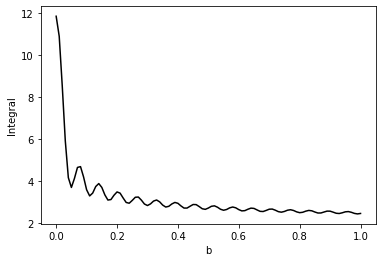

In [6]:
#### o otro metodo seria usar list comprehension
def integrand(x,a,i):
    I = np.sin(a*x) + np.cos(i*x**2)
    return I  

a = 1
b = np.linspace(0,1,101)
Integral = np.array([integrate.quad(integrand, 0, 10,args=(a,i))[0] for i in b])   
fig, ax = plt.subplots(1,1)
ax.plot(b,Integral,'-k',label='I vs b')
ax.set_xlabel('b')
ax.set_ylabel('Integral')


## Ejercicio  3

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio
* a) importar los datos usando pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje x y el eje y).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = 2 \pi \int_0^{r} r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* c) ¿cuál es la diferencia entre scipy.integrate.quad y np.trapz (igual que scipy.integrate.trapz)?

* si decide utilizar np.trapz (igual que scipy.integrate.trapz), ¿cuáles son los argumentos que debe pasar?

* si decide usar scipy.integrate.quad, ¿cómo puede definir la función? 

## Solution Ejercicio 3

In [7]:
df=pd.read_csv('data_radius_density.csv')
df.head()
radius=df['radius']
density=df['density']


In [8]:
import scipy.integrate
import pandas as pd

# np.trapz recibe dos argumentos: np.trapz(Y,X)
m=2.0*np.pi*np.trapz(radius*density,radius)
print(m)

# scipy.integrate.trapz recibe dos argumentos: np.trapz(Y,X)
m=2.0*np.pi*scipy.integrate.trapz(radius*density,radius)

print(m)

80.42728369193308
80.42728369193308


# IMPORTANTE

* numpy.trapz (scipy.integrate.trapz): se usa mas cuando tenemos puntos: aqui $r$ y $\rho(r)$, no sabemos COMO $\rho(r)$ depende de $r$!! 
  - np.trapz(Y,X)
  - scipy.integrate.trapz(Y,X)



* scipy.integrate.quad.: se usa mas cuando sabemos COMO dependen los fariables en la funcion. Por ejemplos si sabemos que $\rho(r)=\sqrt{r}$ podemos definir funcion 
  - def integrand(r):
        2.0*np.pi*r*sqrt(r)
  y resolver este integral usando scipy.integrate.quad     
        

